In [1]:
import os
import sys

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, os.getcwd() + '/../../')
sys.path.insert(0, os.getcwd() + '/../../abm/')
sys.path.insert(0, os.getcwd() + '/../../simulation/')
sys.path.insert(0, os.getcwd() + '/../../mesa/')

from abm.utils.modules import DataManager
from abm.utils.modules.epi_data_extractor import epi_data_extractor
from abm.utils.modules.age_group_extractor import age_group_extractor, recovered_age_group_extractor, mortality_age_group_extractor, case_fatality_age_group_extractor
from abm.resources.util import DATA_DROP_CSV_FILE, BARMM_DATA_LOC

%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 200

warnings.simplefilter('ignore')

In [2]:
locations               = ["BASILAN", "LANAO DEL SUR", "MAGUINDANAO", "SULU", "TAWI-TAWI"]
age_distributions       = [
                            1037200,   # 0 - 9 
                            931800,    # 10 - 19 
                            725000,    # 20 - 29 
                            629100,    # 30 - 39
                            453200,    # 40 - 49
                            296000,    # 50 - 59
                            173700,    # 60 - 69
                            68800,     # 70 - 79
                            15500      # 80 and up
                        ]

population              = [
                            385300,         # Basilan
                            1225700,        # Lanao Del Sur
                            1391100,        # Maguindanao
                            839500,         # Sulu
                            489100          # Tawi-Tawi
                        ]


data_manager            = DataManager(DATA_DROP_CSV_FILE, BARMM_DATA_LOC, "ProvRes", locations, age_distributions)

In [3]:
data_manager.data.head()

,Age,AgeGroup,Sex,DateResultRelease,DateRecover,DateDied,RegionRes,ProvRes,CityMunRes,BarangayPSGC,RemovalType
CaseCode,,,,,,,,,,,
C157857,24.0,20 to 24,MALE,2020-10-25,NaT,NaT,BARMM,MAGUINDANAO,PARANG,NaN,RECOVERED
C892293,26.0,25 to 29,MALE,2020-10-25,NaT,NaT,BARMM,MAGUINDANAO,PARANG,NaN,RECOVERED
C675966,23.0,20 to 24,MALE,2020-10-25,NaT,NaT,BARMM,MAGUINDANAO,PARANG,NaN,RECOVERED
C569817,22.0,20 to 24,MALE,2020-10-25,NaT,NaT,BARMM,MAGUINDANAO,PARANG,NaN,RECOVERED
C563291,23.0,20 to 24,MALE,2020-10-25,NaT,NaT,BARMM,MAGUINDANAO,PARANG,NaN,RECOVERED


In [4]:
epidemic_barrm_df        = epi_data_extractor(data_manager.data, "RegionRes", "BARMM")
epidemic_basilan_df      = epi_data_extractor(data_manager.data, "ProvRes", "BASILAN")
epidemic_lanao_delsur_df = epi_data_extractor(data_manager.data, "ProvRes", "LANAO DEL SUR")
epidemic_maguindanao_df  = epi_data_extractor(data_manager.data, "ProvRes", "MAGUINDANAO")
epidemic_sulu_df         = epi_data_extractor(data_manager.data, "ProvRes", "SULU")
epidemic_tawi_tawi_df    = epi_data_extractor(data_manager.data, "ProvRes", "TAWI-TAWI")

## BARMM COVID19 Cases from DOH Data Drop

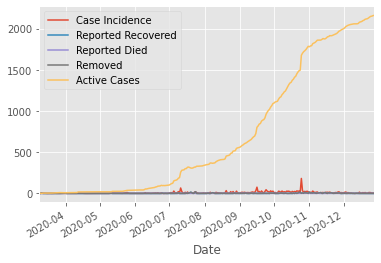

In [5]:
epidemic_barrm_df.plot.line()

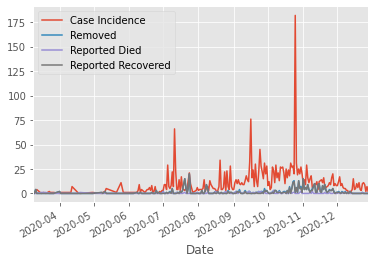

In [6]:
epidemic_barrm_df[epidemic_barrm_df.columns.difference(["Active Cases"])].plot.line()

## Basilan COVID19 Cases from DOH Data Drop

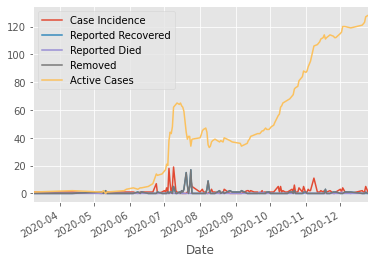

In [7]:
epidemic_basilan_df.plot.line()

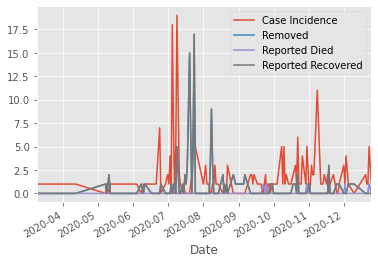

In [8]:
epidemic_basilan_df[epidemic_basilan_df.columns.difference(["Active Cases"])].plot.line()

## Lanao Del Sur COVID19 Cases from DOH Data Drop

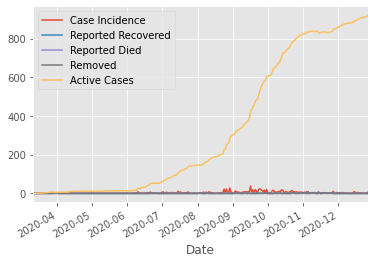

In [9]:
epidemic_lanao_delsur_df.plot.line()

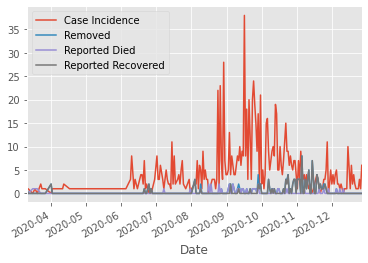

In [10]:
epidemic_lanao_delsur_df[epidemic_lanao_delsur_df.columns.difference(["Active Cases"])].plot.line()

## Maguindanao COVID19 Cases from DOH Data Drop

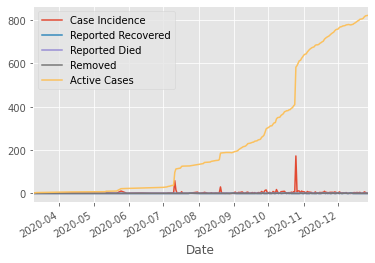

In [11]:
epidemic_maguindanao_df.plot.line()

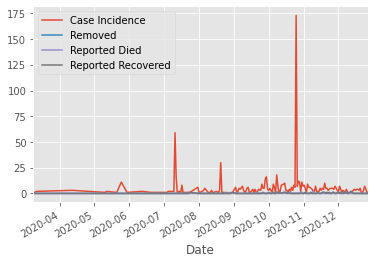

In [12]:
epidemic_maguindanao_df[epidemic_maguindanao_df.columns.difference(["Active Cases"])].plot.line()

## Sulu COVID19 Cases from DOH Data Drop

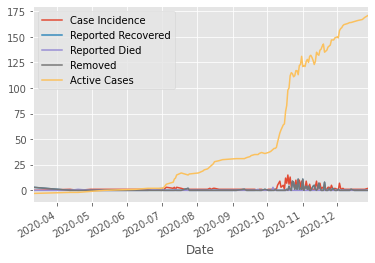

In [13]:
epidemic_sulu_df.plot.line()

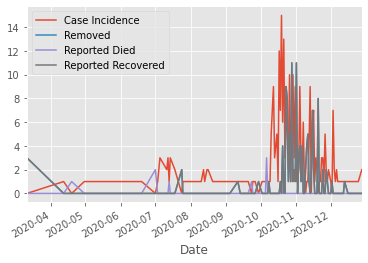

In [14]:
epidemic_sulu_df[epidemic_sulu_df.columns.difference(["Active Cases"])].plot.line()

## Tawi-Tawi COVID19 Cases from DOH Data Drop

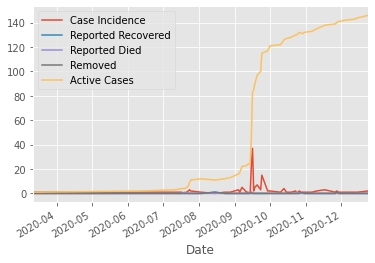

In [15]:
epidemic_tawi_tawi_df.plot.line()

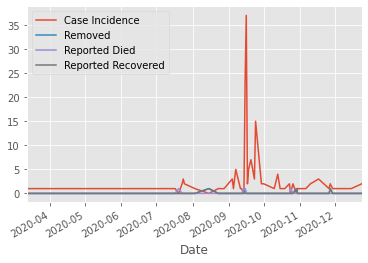

In [16]:
epidemic_tawi_tawi_df[epidemic_tawi_tawi_df.columns.difference(["Active Cases"])].plot.line()

## BARMM COVID19 Cases - Age Distribution

Text(0.5, 1.0, 'BARMM COVID19 Case Incidence - Age Distribution')

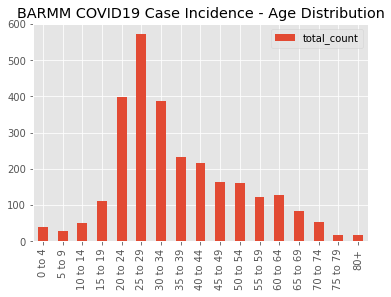

In [21]:
age_group_case_incidences = age_group_extractor(data_manager.data)
age_group_case_incidences.plot.bar()
plt.title("BARMM COVID19 Case Incidence - Age Distribution")

## BARMM COVID19 Recovered - Age Distribution

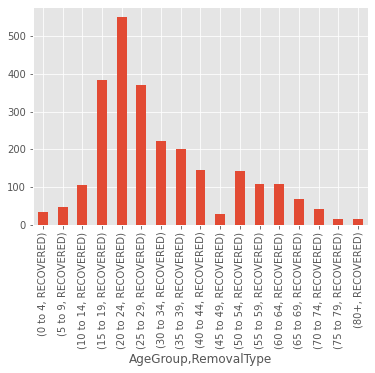

In [18]:
age_group_recovered = recovered_age_group_extractor(data_manager.data)
age_group_recovered.plot.bar()

## BARMM COVID19 Deaths - Age Distribution

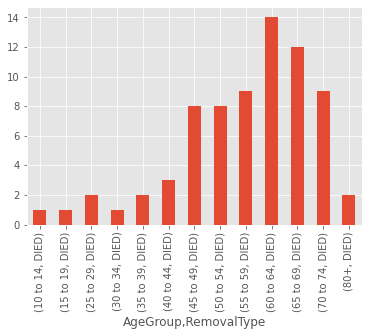

In [19]:
age_group_death_incidences = mortality_age_group_extractor(data_manager.data)
age_group_death_incidences.plot.bar()

## BARMM COVID19 Case Fatality Rates - Age Distribution

Text(0.5, 1.0, 'BARMM COVID19 Case Fatality Rates - Age Distribution')

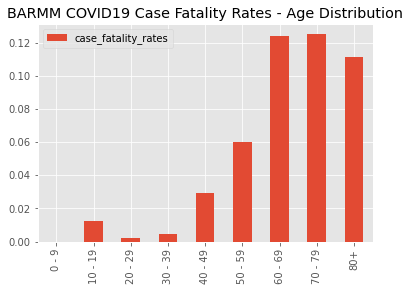

In [20]:
age_group_case_fatality_rates = case_fatality_age_group_extractor(data_manager.data)
age_group_case_fatality_rates.plot.bar()
plt.title("BARMM COVID19 Case Fatality Rates - Age Distribution")